# What are Transformers?

Transformers are a type of deep learning model architecture introduced in the paper "Attention Is All You Need" (Vaswani et al., 2017). They are designed to handle sequential data, such as natural language, and have become the foundation for many state-of-the-art models in natural language processing (NLP), including BERT, GPT, and T5.

The key innovation of transformers is the self-attention mechanism, which allows the model to weigh the importance of different words in a sequence when making predictions. Unlike previous architectures like RNNs and LSTMs, transformers do not require data to be processed in order, enabling much more efficient parallelization and better handling of long-range dependencies.

 Transformers are widely used for tasks such as language modeling, translation, summarization, and more.


## Motivation for Transformers
 
- LSTM or RNN are siquentially processing the data, **not parralll**
- Even though we say the LSTM works well for long term dependencies, **when the sentence is very long, the context is lost.**


## Use Cases of Transformers
 
Transformers have revolutionized a wide range of tasks in artificial intelligence, especially in natural language processing (NLP) and beyond. Some common use cases include:
 
 - **Text Classification:** Sentiment analysis, spam detection, and topic categorization.
 - **Machine Translation:** Translating text from one language to another (e.g., Google Translate).
 - **Text Summarization:** Generating concise summaries of long documents or articles.
 - **Question Answering:** Powering systems that can answer questions based on context (e.g., search engines, chatbots).
 - **Text Generation:** Creating human-like text, stories, or code (e.g., GPT models).
 - **Named Entity Recognition (NER):** Identifying entities like names, dates, and locations in text.
 - **Speech Recognition and Generation:** Converting speech to text and vice versa.
 - **Image Captioning:** Generating textual descriptions for images by combining vision and language models.
 - **Protein Folding and Genomics:** Predicting protein structures and analyzing genetic sequences.
 
Transformers are also being applied in areas such as recommendation systems, time series forecasting, and even reinforcement learning.


# Architecture

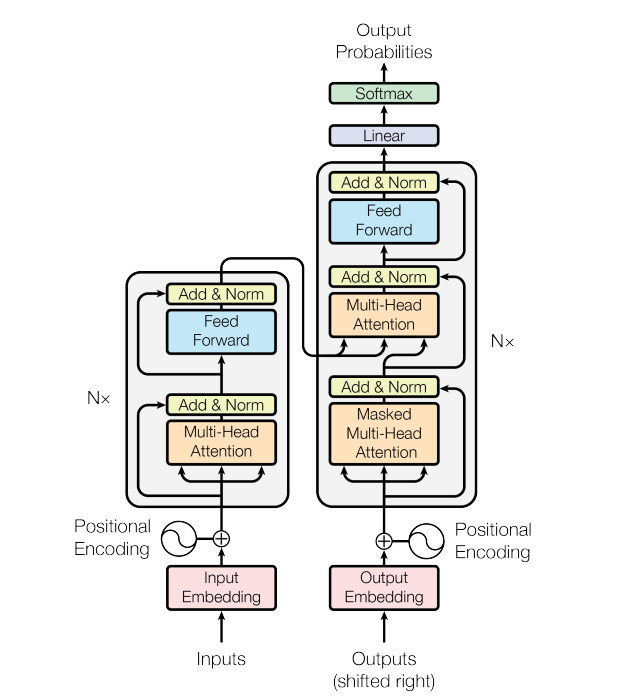

#### Preparation

We begin by turning each input word into a vector using on of the embedding algorithms mentioned below. 



##### Input Embeddings for Transformers
 
Before passing data into the encoder of a transformer, the input tokens (such as words, subwords, or characters) must be converted into numerical vectors, known as embeddings. There are several types of embeddings commonly used:
 
 - **Word Embeddings:** Pretrained embeddings like Word2Vec, GloVe, or FastText can be used to represent each word as a dense vector. However, these are less common in modern transformer models.
 
 - **Learned Token Embeddings:** Most transformer models (e.g., BERT, GPT) use embeddings that are learned from scratch during training. Each token in the vocabulary is assigned a trainable vector.
 
 - **Subword Embeddings:** Tokenization methods like Byte-Pair Encoding (BPE), WordPiece, or SentencePiece split words into subword units, each of which is embedded as a vector. This helps handle rare or unknown words.
 
 - **Character Embeddings:** In some cases, especially for languages with large vocabularies or for handling misspellings, characters are embedded and then combined (e.g., via CNNs or RNNs) to form word-level representations.
 
 - **Positional Embeddings:** Since transformers do not inherently understand the order of tokens, positional information is added to the input embeddings. This can be done using fixed (sinusoidal) or learned positional embeddings.
 
 The final input to the encoder is typically the sum (or concatenation) of the token (or subword) embeddings and the positional embeddings.


# Encoder

 
### How the Transformer Encoder Works: Step by Step
 
 1. **Input Embedding:**  
    Each input token (word, subword, or character) is converted into a dense vector using an embedding Layer. Positional embeddings are **added** to these vectors to encode the order of the sequence. 
    
    Tocken an Positional embeddings size is one of the parameters develops can optimize for their use case.
 
 2. **Input Preparation:**  
    The **sum of token embeddings and positional embeddings** forms the input matrix for the encoder.
 
 3. **Stacked Encoder Layers:**  
    The encoder consists of multiple identical layers (e.g., 6 or 12). Each layer has two main sub-layers:
 
    - **Multi-Head Self-Attention:**  
      Each token attends to all other tokens in the sequence, allowing the model to capture contextual relationships. Multiple attention heads enable the model to focus on different aspects of the sequence simultaneously.
 
    - **Feed-Forward Neural Network:**  
      After self-attention, each token representation is passed through a position-wise feed-forward network (the same network is applied independently to each position).
 
    - **Add & Norm:**  
      Residual connections (skip connections) are added after each sub-layer, followed by layer normalization to stabilize and speed up training.
 
 4. **Output of Encoder:**  
    The final output is a sequence of context-rich vectors, one for each input token. These vectors can be used directly for classification or passed to a decoder for sequence generation tasks.


# Decoder

### How the Transformer Decoder Works: Step by Step
 
 1. **Input Embedding:**  
    The decoder receives the target sequence (e.g., previous output tokens during training or generated tokens during inference). Each token is converted into a dense vector using an embedding layer, and positional embeddings are added to encode the order.
 
 2. **Input Preparation:**  
    The sum of token embeddings and positional embeddings forms the input matrix for the decoder.
 
 3. **Stacked Decoder Layers:**  
    The decoder is composed of multiple identical layers (e.g., 6 or 12). Each layer contains three main sub-layers:
 
    - **Masked Multi-Head Self-Attention:**  
      Each token in the target sequence attends to previous tokens (not future tokens) using a mask, ensuring the model cannot "cheat" by looking ahead during training or inference.
 
    - **Encoder-Decoder Multi-Head Attention:**  
      Each position in the decoder attends to all positions in the encoder's output, allowing the decoder to use information from the input sequence.
 
    - **Feed-Forward Neural Network:**  
      Each token representation is passed through a position-wise feed-forward network (the same network is applied independently to each position).
 
    - **Add & Norm:**  
      Residual connections are added after each sub-layer, followed by layer normalization.
 
 4. **Output of Decoder:**  
    The final output is a sequence of vectors, one for each position in the target sequence. These vectors are typically passed through a linear layer and softmax to generate probabilities over the vocabulary for the next token prediction.


## Pros and Cons of Transformers
 
 **Pros:**
 - **Parallelization:** Unlike RNNs, transformers process input data in parallel, leading to faster training times.
 - **Long-Range Dependencies:** Self-attention allows transformers to capture relationships between distant elements in a sequence.
 - **Scalability:** Transformers scale well with data and model size, enabling the creation of large, powerful models (e.g., GPT, BERT).
 - **Versatility:** They are effective across various domains, including NLP, vision, and even genomics.
 - **Transfer Learning:** Pretrained transformer models can be fine-tuned for many downstream tasks, reducing the need for large labeled datasets.
 
 **Cons:**
 - **Computational Cost:** Transformers require significant memory and computational resources, especially for long sequences.
 - **Data Hungry:** They often need large amounts of data to achieve optimal performance.
 - **Interpretability:** The self-attention mechanism can be difficult to interpret compared to simpler models.
 - **Quadratic Complexity:** The self-attention operation scales quadratically with sequence length, making it challenging to process very long inputs.
 - **Overfitting:** Large transformer models can overfit if not properly regularized or if trained on small datasets.
